# Goals and Mission

The goal of this file is to chose the best living location possible. The model includes following components.

Living location properties:
* Locations of interests.
    * Main comparison point is place of living.
    * Each individual is allowed unlimited number of places destinations of importance.
* Travel modes include, transit (PT), biking and walking.
* Fastest arrival times are provided for these area.
* Night and day travel (IK you are kinda freaky)

Goodness of fit:
* Each individual is assigned a single composite point.
    * They can divide it by however many locations they fancy and by whatever weighting fancied.
* The model will provide both individual and overall goodness scores for an area
* Weighting for night and day travel.


### Assumptions

Travelling to takes the same amount of time as travelling back

Enable the following :
* Maps JavaScript API
* Directions API

Get you google API key from the stored file.

# Classes
Following classes make the magic happen
### Navigator
Key google maps API and DB interactions are stored within the [Navigator](Navigator.py) class.
### 
Individuals preferences are stored within the [Person](Person.py) class

In [23]:
import pandas as pd
from Navigator import Navigator
from Person import Person
import seaborn as sns


navigator = Navigator()


We first input each individual and their importance preferences:


In [24]:


Povilas = Person( navigator, "Buckingham Palace", "Povilas")
Povilas.destinations = {"Imperial College London, South Kensington Campus":1,
                    "Imperial College London, White City Campus":1}
Povilas.time = {"day": 1}
Povilas.go_there()


Simas = Person( navigator, "Buckingham Palace", "Simas")
Simas.destinations = {"Imperial College London, South Kensington Campus":1}
Simas.time = {"day": 1}
Simas.go_there()


Jokubas = Person( navigator, "Buckingham Palace", "Jokubas")
Jokubas.destinations = {"King's College London Strand Campus":1}
Jokubas.time = {"day": 1}
Jokubas.go_there()

#IDK where Juozas


df = pd.concat([Povilas.results, Simas.results, Jokubas.results], ignore_index=True)
display(df)



,duration,distance,origin,destination,time_of_day,mode,location_importance,mode_importance,time_importance,name
0,27,3.5,Buckingham Palace,"Imperial College London, South Kensington Campus",day,transit,0.5,0.5,1.0,Povilas
1,43,3.1,Buckingham Palace,"Imperial College London, South Kensington Campus",day,walking,0.5,0.5,1.0,Povilas
2,50,10.3,Buckingham Palace,"Imperial College London, White City Campus",day,transit,0.5,0.5,1.0,Povilas
3,105,7.6,Buckingham Palace,"Imperial College London, White City Campus",day,walking,0.5,0.5,1.0,Povilas
4,27,3.5,Buckingham Palace,"Imperial College London, South Kensington Campus",day,transit,1.0,0.5,1.0,Simas
5,43,3.1,Buckingham Palace,"Imperial College London, South Kensington Campus",day,walking,1.0,0.5,1.0,Simas
6,18,3.1,Buckingham Palace,King's College London Strand Campus,day,transit,1.0,0.5,1.0,Jokubas
7,33,2.3,Buckingham Palace,King's College London Strand Campus,day,walking,1.0,0.5,1.0,Jokubas


# Data Analysis
What follows is a straightforward data analysis and aggregation algorithm. 
Its something that needs to be discussed and optimized very much in-context. 

In a very simple case. We treat 0 minutes as ideal and 60 as as bad as it gets.



,duration,distance,location_importance,mode_importance,time_importance,goodness
name,,,,,,
Jokubas,51,5.4,2.0,1.0,2.0,0.575000
Povilas,225,24.5,2.0,2.0,4.0,0.250000
Simas,70,6.6,2.0,1.0,2.0,0.416667


<Axes: xlabel='name', ylabel='goodness'>

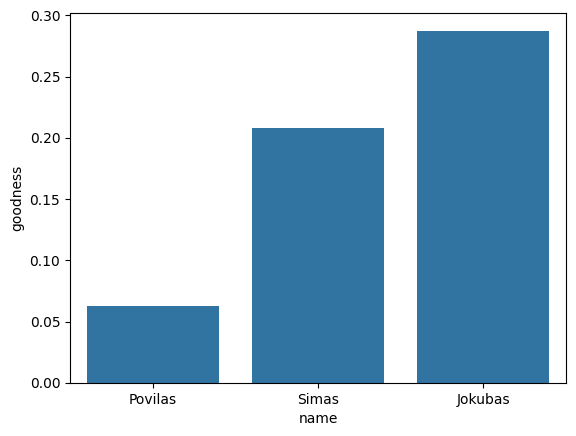

In [25]:
df['goodness'] = 1 - (df['duration'] / 60)
df['goodness'] = df['goodness'].clip(lower=0)*df.location_importance*df.mode_importance*df.time_importance
display(df.groupby("name").sum("goodness"))


sns.barplot(x=df.name, y=df.goodness, errorbar=None)